#Import Libraries#

In [343]:
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import re
from sklearn.preprocessing import OneHotEncoder

In [344]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Data Preprocessing#

In [345]:
# drop all rows that were used in mturk
org_df = pd.read_csv('/content/drive/MyDrive/okcupid_profiles.csv') 
mturk_df = pd.read_csv('/content/drive/MyDrive/AGG_Output_Averages.csv') 

In [346]:
org_df.head(0)

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,pets,religion,sign,smokes,speaks,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9


In [347]:
profiles_df = org_df.drop(['essay0', 'essay1','essay2', 'essay3','essay4', 'essay5','essay6', 'essay7','essay8', 'essay9', 'income', 'last_online', 'status', 'ethnicity', 'height', 'location', 'speaks'], axis=1)


In [348]:
for col in profiles_df:
    print(profiles_df[col].unique())

[ 22  35  38  23  29  32  31  24  37  28  30  39  33  26  27  20  25  40
  36  21  34  43  46  41  42  45  18  55  50  59  44  48  54  51  62  52
  19  58  66  53  63  47  49  61  60  57  56  65  64  68 110  69  67 109]
['m' 'f']
['straight' 'bisexual' 'gay']
['a little extra' 'average' 'thin' 'athletic' 'fit' nan 'skinny' 'curvy'
 'full figured' 'jacked' 'rather not say' 'used up' 'overweight']
['strictly anything' 'mostly other' 'anything' 'vegetarian' nan
 'mostly anything' 'mostly vegetarian' 'strictly vegan'
 'strictly vegetarian' 'mostly vegan' 'strictly other' 'mostly halal'
 'other' 'vegan' 'mostly kosher' 'strictly halal' 'halal'
 'strictly kosher' 'kosher']
['socially' 'often' 'not at all' 'rarely' nan 'very often' 'desperately']
['never' 'sometimes' nan 'often']
['working on college/university' 'working on space camp'
 'graduated from masters program' 'graduated from college/university'
 'working on two-year college' nan 'graduated from high school'
 'working on masters prog

In [349]:
def categorize_bodytype(data_frame):
  for row_index in range(data_frame.shape[0]):
      # Categorize body type
      cell_value = data_frame['body_type'][row_index]
      category = 'average'
      if type(cell_value) != float and 'athletic' in cell_value:
        category = 'fit'
      if type(cell_value) != float and 'skinny' in cell_value:
        category = 'thin'
      if type(cell_value) != float and 'jacked' in cell_value:
        category = 'fit'
      if type(cell_value) != float and 'full figured' in cell_value:
        category = 'curvy'
      if type(cell_value) != float and 'a little extra' in cell_value:
        category = 'curvy'
      data_frame['body_type'][row_index]= category


def categorize_diet(data_frame):
  for row_index in range(data_frame.shape[0]):
      # Categorize diet
      cell_value = data_frame['diet'][row_index]
      category = 'anything'
      if type(cell_value) != float and 'vegetarian' in cell_value:
        category = 'vegetarian'
      if type(cell_value) != float and 'vegan' in cell_value:
        category = 'vegan'
      if type(cell_value) != float and 'halal' in cell_value:
        category = 'halal'
      data_frame['diet'][row_index]= category


def categorize_religion(data_frame):
  for row_index in range(data_frame.shape[0]):
      # Categorize religion
      cell_value = data_frame['religion'][row_index]
      category = 'other'
      if type(cell_value) != float and 'agnostic' in cell_value:
        category = 'agnostic'
      if type(cell_value) != float and 'atheist' in cell_value:
        category = 'atheist'
      if type(cell_value) != float and 'christian' in cell_value:
        category = 'christian'
      if type(cell_value) != float and 'catholicism' in cell_value:
        category = 'catholicism'
      if type(cell_value) != float and 'buddhism' in cell_value:
        category = 'buddhism'
      if type(cell_value) != float and 'hinduism' in cell_value:
        category = 'hinduism'
      if type(cell_value) != float and 'judaism' in cell_value:
        category = 'judaism'
      if type(cell_value) != float and 'islam' in cell_value:
        category = 'islam'
      data_frame['religion'][row_index]= category


def categorize_sign(data_frame):
  for row_index in range(data_frame.shape[0]):
      # Categorize sign
      cell_value = data_frame['sign'][row_index]
      category = 'aquarius'
      if type(cell_value) != float and 'pisces' in cell_value:
        category = 'pisces'
      if type(cell_value) != float and 'aries' in cell_value:
        category = 'aries'
      if type(cell_value) != float and 'taurus' in cell_value:
        category = 'taurus'
      if type(cell_value) != float and 'gemini' in cell_value:
        category = 'gemini'
      if type(cell_value) != float and 'cancer' in cell_value:
        category = 'cancer'
      if type(cell_value) != float and 'leo' in cell_value:
        category = 'leo'
      if type(cell_value) != float and 'virgo' in cell_value:
        category = 'virgo'
      if type(cell_value) != float and 'libra' in cell_value:
        category = 'libra'
      if type(cell_value) != float and 'scorpio' in cell_value:
        category = 'scorpio'
      if type(cell_value) != float and 'sagittarius' in cell_value:
        category = 'sagittarius'
      if type(cell_value) != float and 'capricorn' in cell_value:
        category = 'capricorn'
      data_frame['sign'][row_index]= category  


def categorize_education(data_frame):
  for row_index in range(data_frame.shape[0]):
      # Categorize education
      cell_value = data_frame['education'][row_index]
      category = 'graduated college'
      if type(cell_value) != float and 'dropped out of high school' in cell_value:
        category = 'less than high school'
      if type(cell_value) != float and 'working on high school' in cell_value:
        category = 'less than high school'
      if type(cell_value) != float and 'high school' in cell_value:
        category = 'less than high school'
      if type(cell_value) != float and 'graduated from high school' in cell_value:
        category = 'graduated high school'
      if type(cell_value) != float and 'dropped out of college/university' in cell_value:
        category = 'graduated high school'
      if type(cell_value) != float and 'dropped out of two-year college' in cell_value:
        category = 'graduated high school'
      if type(cell_value) != float and 'working on college/university' in cell_value:
        category = 'in college'
      if type(cell_value) != float and 'working on two-year college' in cell_value:
        category = 'in college'
      if type(cell_value) != float and 'college/university' in cell_value:
        category = 'in college'
      if type(cell_value) != float and 'two-year college' in cell_value:
        category = 'in college'
      data_frame['education'][row_index]= category


# New categorize function
def categorize_new(data_frame):
  categorize_bodytype(data_frame)
  categorize_diet(data_frame)
  categorize_religion(data_frame)
  categorize_sign(data_frame)
  categorize_education(data_frame)


In [350]:
# Use mturk_df (AGG_Output_Averages.csv) to populate goldstandard_df
goldstandard_data = []
for row_index in range(mturk_df.shape[0]):
  max_average = mturk_df['Max_average'][row_index]
  # Find which rated person has the highest average rating for this profile, arbitarily choosing
  # a profile in case of repeats (since profiles were already randomly selected)
  highest_match_index = -1
  for person_index in range(9):
    column_name = "Answer.comparison" + str(person_index + 1)
    current_rating = mturk_df[column_name][row_index]
    if current_rating == max_average:
      highest_match_index = person_index + 1
      break
  # Add appropriate cells from input profile and corresponding match profile
  # into row of new dataframe
  row_values = []
  attribute_list = ['age', 'sex', 'orientation', 'body_type', 'diet', 'drinks', 'drugs', 'education',
                    'job', 'offspring', 'pets', 'religion', 'sign', 'smokes']
  for attribute in attribute_list:
    row_values.append(mturk_df["Input." + attribute][row_index])
  for attribute in attribute_list:
    row_values.append(mturk_df["Input.person" + str(highest_match_index) + "_" + attribute][row_index])
  goldstandard_data.append(row_values)

goldstandard_df = pd.DataFrame(data = goldstandard_data, columns = [
                    'Input.age', 'Input.sex', 'Input.orientation', 'Input.body_type', 'Input.diet', 'Input.drinks', 'Input.drugs', 'Input.education',
                    'Input.job', 'Input.offspring', 'Input.pets', 'Input.religion', 'Input.sign', 'Input.smokes',
                    'Match.age', 'Match.sex', 'Match.orientation', 'Match.body_type', 'Match.diet', 'Match.drinks', 'Match.drugs', 'Match.education',
                    'Match.job', 'Match.offspring', 'Match.pets', 'Match.religion', 'Match.sign', 'Match.smokes'
                    ])

goldstandard_df.to_csv('/content/drive/MyDrive/goldstandard_data.csv', index=False)

In [351]:
goldstandard_df.head()
input_df = goldstandard_df[['Input.age', 'Input.sex', 'Input.orientation', 'Input.body_type', 'Input.diet', 'Input.drinks', 'Input.drugs', 'Input.education',
                    'Input.job', 'Input.offspring', 'Input.pets', 'Input.religion', 'Input.sign', 'Input.smokes']]
matches_df = goldstandard_df.drop(['Input.age', 'Input.sex', 'Input.orientation', 'Input.body_type', 'Input.diet', 'Input.drinks', 'Input.drugs', 'Input.education',
                    'Input.job', 'Input.offspring', 'Input.pets', 'Input.religion', 'Input.sign', 'Input.smokes'], axis = 1)                  

In [352]:
input_df.columns = list(profiles_df.columns)
matches_df.columns = list(profiles_df.columns)

In [353]:
matches_df.head()

,age,sex,orientation,body_type,diet,drinks,drugs,education,job,offspring,pets,religion,sign,smokes
0,36,f,bisexual,NaN,NaN,often,never,dropped out of ph.d program,education / academia,NaN,likes dogs and likes cats,atheism and somewhat serious about it,NaN,when drinking
1,37,m,gay,fit,strictly anything,often,sometimes,working on two-year college,student,NaN,likes dogs and has cats,atheism and very serious about it,taurus,no
2,22,m,straight,fit,mostly other,socially,never,working on college/university,artistic / musical / writer,NaN,likes cats,atheism but not too serious about it,aries but it doesn't matter,no
3,33,f,bisexual,fit,NaN,NaN,never,NaN,sales / marketing / biz dev,doesn't have kids,NaN,NaN,NaN,no
4,35,f,straight,fit,anything,often,never,graduated from college/university,NaN,"doesn't have kids, and doesn't want any",NaN,agnosticism and laughing about it,libra and its fun to think about,no


In [354]:
profiles_df['input_row'] = 0
input_df['input_row'] = 1
matches_df['input_row'] = 2
profiles_df = profiles_df.append(input_df, ignore_index=True)
profiles_df = profiles_df.append(matches_df, ignore_index=True)
categorize_new(profiles_df)





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/

In [355]:
profiles_df.columns

Index(['age', 'sex', 'orientation', 'body_type', 'diet', 'drinks', 'drugs',
       'education', 'job', 'offspring', 'pets', 'religion', 'sign', 'smokes',
       'input_row'],
      dtype='object')

In [356]:
with_sex_df = profiles_df.copy()

In [357]:
profiles_df.drop('sex', axis =1, inplace = True)

In [358]:
data_df = profiles_df.copy()

In [359]:
# encode trainning and inputs and labels 
from sklearn import preprocessing
cats = list(profiles_df.columns)

for col in cats:
  data_df[col] = data_df[col].astype('category')
  colum = pd.get_dummies(data_df[col], prefix=col)
  data_df = data_df.drop(columns = [col])
  data_df = pd.concat([data_df, colum], axis=1)



In [360]:
print(list(data_df.columns))

['age_18', 'age_19', 'age_20', 'age_21', 'age_22', 'age_23', 'age_24', 'age_25', 'age_26', 'age_27', 'age_28', 'age_29', 'age_30', 'age_31', 'age_32', 'age_33', 'age_34', 'age_35', 'age_36', 'age_37', 'age_38', 'age_39', 'age_40', 'age_41', 'age_42', 'age_43', 'age_44', 'age_45', 'age_46', 'age_47', 'age_48', 'age_49', 'age_50', 'age_51', 'age_52', 'age_53', 'age_54', 'age_55', 'age_56', 'age_57', 'age_58', 'age_59', 'age_60', 'age_61', 'age_62', 'age_63', 'age_64', 'age_65', 'age_66', 'age_67', 'age_68', 'age_69', 'age_109', 'age_110', 'orientation_bisexual', 'orientation_gay', 'orientation_straight', 'body_type_average', 'body_type_curvy', 'body_type_fit', 'body_type_thin', 'diet_anything', 'diet_halal', 'diet_vegan', 'diet_vegetarian', 'drinks_desperately', 'drinks_not at all', 'drinks_often', 'drinks_rarely', 'drinks_socially', 'drinks_very often', 'drugs_never', 'drugs_often', 'drugs_sometimes', 'education_graduated college', 'education_graduated high school', 'education_in colleg

In [361]:
input_encoding = data_df.loc[data_df['input_row_1'] == 1]
labels_encoding = data_df.loc[data_df['input_row_2'] == 1]
train_encoding = data_df.loc[data_df['input_row_0'] == 1]

In [362]:
input_encoding.drop(['input_row_0','input_row_1','input_row_2'] ,
  axis='columns', inplace=True)
labels_encoding.drop(['input_row_0','input_row_1','input_row_2'] ,
  axis='columns', inplace=True)
train_encoding.drop(['input_row_0','input_row_1','input_row_2'] ,
  axis='columns', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [363]:
print(list(train_encoding.columns))

['age_18', 'age_19', 'age_20', 'age_21', 'age_22', 'age_23', 'age_24', 'age_25', 'age_26', 'age_27', 'age_28', 'age_29', 'age_30', 'age_31', 'age_32', 'age_33', 'age_34', 'age_35', 'age_36', 'age_37', 'age_38', 'age_39', 'age_40', 'age_41', 'age_42', 'age_43', 'age_44', 'age_45', 'age_46', 'age_47', 'age_48', 'age_49', 'age_50', 'age_51', 'age_52', 'age_53', 'age_54', 'age_55', 'age_56', 'age_57', 'age_58', 'age_59', 'age_60', 'age_61', 'age_62', 'age_63', 'age_64', 'age_65', 'age_66', 'age_67', 'age_68', 'age_69', 'age_109', 'age_110', 'orientation_bisexual', 'orientation_gay', 'orientation_straight', 'body_type_average', 'body_type_curvy', 'body_type_fit', 'body_type_thin', 'diet_anything', 'diet_halal', 'diet_vegan', 'diet_vegetarian', 'drinks_desperately', 'drinks_not at all', 'drinks_often', 'drinks_rarely', 'drinks_socially', 'drinks_very often', 'drugs_never', 'drugs_often', 'drugs_sometimes', 'education_graduated college', 'education_graduated high school', 'education_in colleg

#Machine Learning Model and Analysis#

In [364]:
nneigh = NearestNeighbors()
nneigh.fit(train_encoding.to_numpy())


NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [365]:
def candidates(df, input):
  df = df.iloc[1: , :]
  if input[2] == 'straight':
    output = df.loc[df['orientation'].isin(['straight', 'bisexual'])]
    output = output.loc[output['sex'] != input[1]]
  elif input[2] == 'gay': 
    output = df.loc[df['orientation'].isin(['bisexual','gay'])]
    output = output.loc[output['sex'] == input[1]]
  else :
    output = df.loc[sex['orientation'].isin(['bisexual','gay','straight'])]
  match = output.head(1)  
  return match    

In [389]:

def accuracy(input,match):
  i = set(input)
  m = set(match)
  z = len(i.difference(m)) - 2
  if z < 0 :
    z = 0
  return ((len(i) - z)/len(i)) *100


In [384]:
res = round(accuracy(input_profile,match), 2)
print(res)


TypeError: ignored

In [404]:
# use mturk rankings to see how well the model matches the profile
input_profiles_list = input_df.values.tolist()
mturk_matches = matches_df.values.tolist()

inputs = []
matches = []
scores = []
sc_mturk = []
mturk_match = []
acc = []

for i, input in input_encoding.iterrows():
  y_pred = nneigh.kneighbors([input], 50, return_distance=False)
  input_profile = input_profiles_list.pop(0)
  mturk_profile = mturk_matches.pop(0) 
  pred_match = profiles_df.iloc[y_pred[0]]
  sex = with_sex_df.iloc[y_pred[0]]    
  m = candidates(sex,input_profile).values.tolist()
  if not m:
    continue
  match = m[0]
  res = round(accuracy(input_profile,match),2)
  res_acc = round(accuracy(match,mturk_profile), 2)
  res_mturk = round(accuracy(input_profile,mturk_profile), 2)

  inputs.append(input_profile)
  matches.append(match)
  mturk_match.append(mturk_profile)

  scores.append(res)  
  acc.append(res_acc)
  sc_mturk.append(res_mturk)



In [380]:
sex.head()

,age,sex,orientation,body_type,diet,drinks,drugs,education,job,offspring,pets,religion,sign,smokes,input_row
16938,22,m,straight,fit,anything,socially,never,in college,student,NaN,NaN,other,libra,no,0
9631,22,m,straight,fit,anything,socially,never,in college,student,NaN,NaN,other,libra,when drinking,0
2832,22,m,straight,fit,anything,socially,never,in college,artistic / musical / writer,NaN,NaN,other,libra,no,0
47940,22,m,straight,fit,anything,socially,never,in college,student,NaN,NaN,christian,libra,no,0
46779,20,m,straight,fit,anything,socially,never,in college,student,NaN,NaN,other,libra,no,0


In [405]:
res_in_df  = pd.DataFrame(inputs, columns=list(with_sex_df.columns))
res_ma_df = pd.DataFrame(matches, columns=list(with_sex_df.columns))
res_sc_df= pd.DataFrame(scores, columns=['scores_model'])
res_acc_df = pd.DataFrame(acc, columns=['accuracy'])
res_mt_sc_df = pd.DataFrame(sc_mturk, columns=['scores_mturk'])
res_mturk_df = pd.DataFrame(mturk_match, columns=with_sex_df.columns)


In [ ]:
res_in_df.head()

In [406]:
res_in_df.drop('input_row', axis = 1, inplace = True)
res_ma_df.drop('input_row', axis = 1, inplace = True)
res_mturk_df.drop('input_row', axis = 1, inplace = True)

In [407]:
res_ma_df.columns = ['Match.age', 'Match.sex', 'Match.orientation', 'Match.body_type', 'Match.diet', 'Match.drinks', 'Match.drugs', 'Match.education',
                    'Match.job', 'Match.offspring', 'Match.pets', 'Match.religion', 'Match.sign', 'Match.smokes']
res_mturk_df.columns = ['Mturk.age', 'Mturk.sex', 'Mturk.orientation', 'Mturk.body_type', 'Mturk.diet', 'Mturk.drinks', 'Mturk.drugs', 'Mturk.education',
                    'Mturk.job', 'Mturk.offspring', 'Mturk.pets', 'Mturk.religion', 'Mturk.sign', 'Mturk.smokes']                    

results_df = pd.concat([res_in_df, res_ma_df,res_mturk_df, res_sc_df, res_mt_sc_df, res_acc_df ], axis = 1)

In [408]:
results_df.head()

,age,sex,orientation,body_type,diet,drinks,drugs,education,job,offspring,pets,religion,sign,smokes,Match.age,Match.sex,Match.orientation,Match.body_type,Match.diet,Match.drinks,Match.drugs,Match.education,Match.job,Match.offspring,Match.pets,Match.religion,Match.sign,Match.smokes,Mturk.age,Mturk.sex,Mturk.orientation,Mturk.body_type,Mturk.diet,Mturk.drinks,Mturk.drugs,Mturk.education,Mturk.job,Mturk.offspring,Mturk.pets,Mturk.religion,Mturk.sign,Mturk.smokes,scores_model,scores_mturk,accuracy
0,22,m,straight,athletic,mostly anything,socially,never,working on college/university,student,NaN,NaN,NaN,libra,no,22,f,straight,average,anything,socially,never,in college,student,NaN,likes dogs,other,libra,no,36,f,bisexual,NaN,NaN,often,never,dropped out of ph.d program,education / academia,NaN,likes dogs and likes cats,atheism and somewhat serious about it,NaN,when drinking,76.92,30.77,33.33
1,35,m,gay,average,NaN,NaN,never,NaN,NaN,NaN,NaN,NaN,leo,no,35,m,gay,average,anything,NaN,never,graduated college,NaN,NaN,NaN,other,scorpio,no,37,m,gay,fit,strictly anything,often,sometimes,working on two-year college,student,NaN,likes dogs and has cats,atheism and very serious about it,taurus,no,100.00,66.67,50.00
2,24,f,bisexual,curvy,mostly vegetarian,socially,NaN,graduated from space camp,student,doesn't want kids,likes dogs and likes cats,NaN,leo,sometimes,24,f,bisexual,average,anything,socially,NaN,graduated college,student,NaN,likes dogs and likes cats,judaism,cancer,sometimes,22,m,straight,fit,mostly other,socially,never,working on college/university,artistic / musical / writer,NaN,likes cats,atheism but not too serious about it,aries but it doesn't matter,no,71.43,28.57,28.57
3,53,m,straight,athletic,mostly vegetarian,socially,NaN,graduated from college/university,political / government,"doesn't have kids, but wants them",likes dogs and likes cats,atheism and laughing about it,capricorn and its fun to think about,no,24,f,straight,fit,vegetarian,socially,NaN,in college,sales / marketing / biz dev,NaN,NaN,other,capricorn,no,33,f,bisexual,fit,NaN,NaN,never,NaN,sales / marketing / biz dev,doesn't have kids,NaN,NaN,NaN,no,40.00,26.67,53.85
4,20,m,straight,skinny,mostly anything,socially,never,working on college/university,student,doesn't have kids,NaN,NaN,scorpio,no,20,f,straight,thin,anything,socially,never,in college,student,NaN,likes dogs,other,scorpio,no,35,f,straight,fit,anything,often,never,graduated from college/university,NaN,"doesn't have kids, and doesn't want any",NaN,agnosticism and laughing about it,libra and its fun to think about,no,71.43,42.86,53.33


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text major ticklabel objects>)

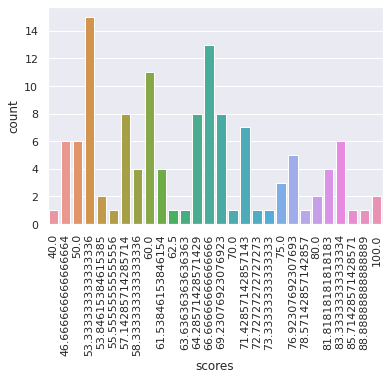

In [401]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="scores_model", data=results_df)
plt.xticks(rotation=90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

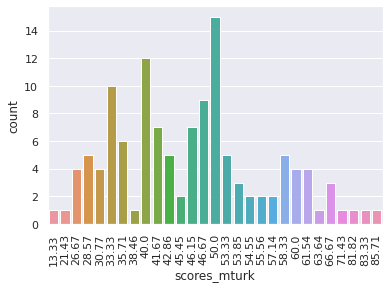

In [409]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="scores_mturk", data=results_df)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text major ticklabel objects>)

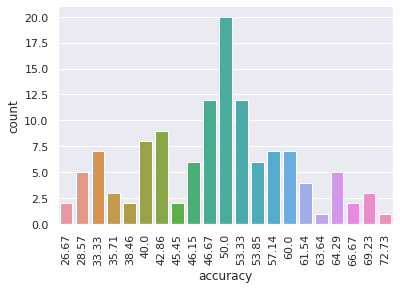

In [410]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="accuracy", data=results_df)
plt.xticks(rotation=90)

In [411]:
results_df.to_csv('/content/drive/MyDrive/results.csv', index=False)